In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\I354298\Desktop\SAP_laptop_backup\Desktop\AIML\Janatahack4")
data_train = pd.read_csv("train_Wc8LBpr.csv")
data_test = pd.read_csv("test_VsU9xXK.csv")

In [6]:
data_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [2]:
combine = pd.concat([data_train,data_test],ignore_index=True, sort=False)

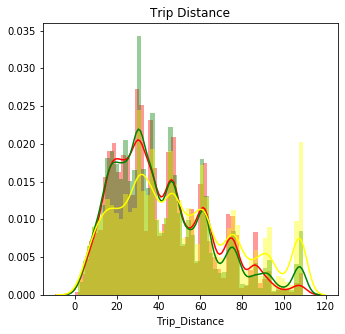

In [26]:
data1=data_train.loc[data_train["Surge_Pricing_Type"]==1]
data2=data_train.loc[data_train["Surge_Pricing_Type"]==2]
data3=data_train.loc[data_train["Surge_Pricing_Type"]==3]
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Trip_Distance"],color="red")
sns.distplot(data2["Trip_Distance"],color="green")
sns.distplot(data3["Trip_Distance"],color="yellow")
plt.title("Trip Distance")
plt.show()

In [13]:
data_train["Surge_Pricing_Type"].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [39]:
data_train.shape

(131662, 14)

In [40]:
data_test.shape

(87395, 13)

In [68]:
combine.shape

(219057, 14)

In [43]:
combine["Surge_Pricing_Type"].isnull().sum()

87395

In [3]:
null_dict={}
for col in combine.columns:
    null_dict[col] = combine[col].isnull().sum()

In [45]:
print(null_dict)

{'Trip_ID': 0, 'Trip_Distance': 0, 'Type_of_Cab': 33368, 'Customer_Since_Months': 9886, 'Life_Style_Index': 33520, 'Confidence_Life_Style_Index': 33520, 'Destination_Type': 0, 'Customer_Rating': 0, 'Cancellation_Last_1Month': 0, 'Var1': 117819, 'Var2': 0, 'Var3': 0, 'Gender': 0, 'Surge_Pricing_Type': 87395}


In [25]:
combine["Type_of_Cab"].value_counts()

B    51585
C    46732
A    35878
D    31885
E    19609
Name: Type_of_Cab, dtype: int64

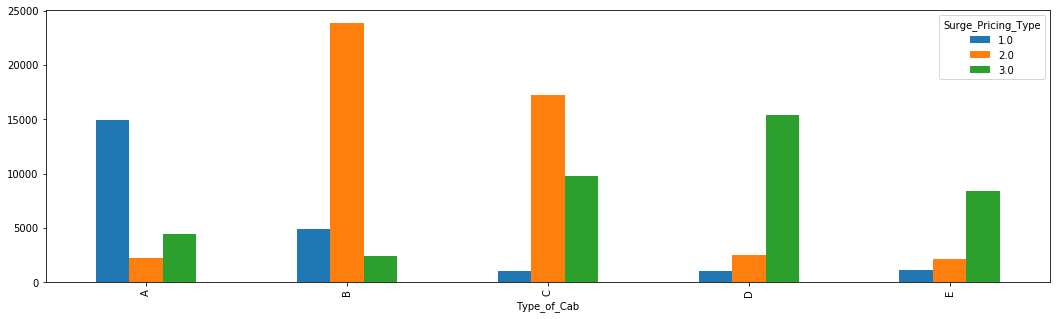

In [26]:
combine.groupby("Surge_Pricing_Type").Type_of_Cab.value_counts().unstack(0).plot.bar()

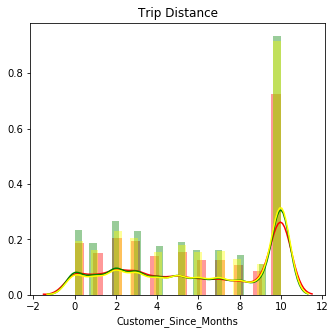

In [31]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Customer_Since_Months"],color="red")
sns.distplot(data2["Customer_Since_Months"],color="green")
sns.distplot(data3["Customer_Since_Months"],color="yellow")
plt.title("Trip Distance")
plt.show()

In [4]:
custmon =[]
for i in range(len(combine)):
    if combine["Customer_Since_Months"][i] ==10.0:
        custmon.append("Ten")
    elif combine["Customer_Since_Months"][i]>=7.0:
        custmon.append("7to9")
    elif combine["Customer_Since_Months"][i]>=4.0:
        custmon.append("4to6")
    elif combine["Customer_Since_Months"][i]>=0.0:
        custmon.append("0to3")
    else:
        custmon.append(combine["Customer_Since_Months"][i])

In [5]:
combine["Customer_Since_Months"]=custmon

In [73]:
combine["Customer_Since_Months"].isnull().sum()

9886

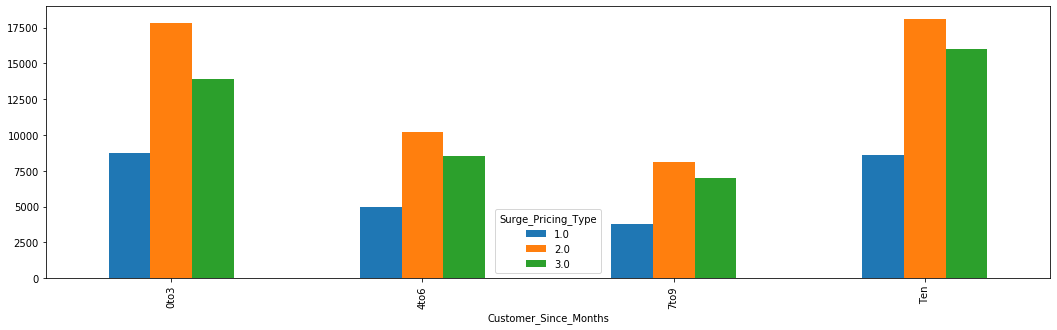

In [75]:
combine.groupby("Surge_Pricing_Type").Customer_Since_Months.value_counts().unstack(0).plot.bar()

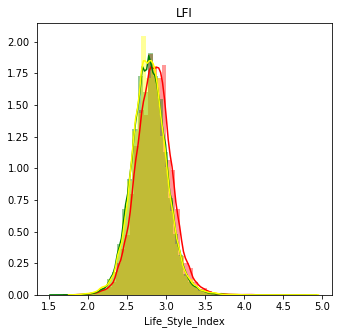

In [76]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Life_Style_Index"],color="red")
sns.distplot(data2["Life_Style_Index"],color="green")
sns.distplot(data3["Life_Style_Index"],color="yellow")
plt.title("LFI")
plt.show()

In [80]:
combine["Life_Style_Index"].describe()

count    185537.000000
mean          2.802594
std           0.226323
min           1.317850
25%           2.654620
50%           2.798280
75%           2.947650
max           4.875110
Name: Life_Style_Index, dtype: float64

In [6]:
combine["Life_Style_Index"].fillna(np.mean(combine["Life_Style_Index"]),inplace=True)

In [83]:
combine["Life_Style_Index"].isnull().sum()

0

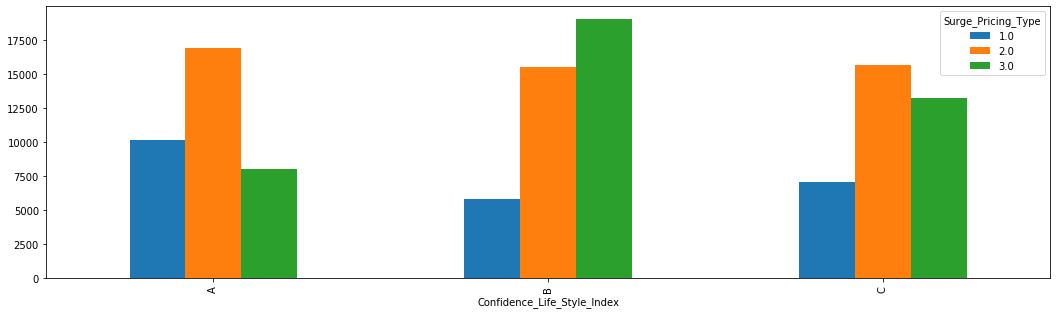

In [85]:
combine.groupby("Surge_Pricing_Type").Confidence_Life_Style_Index.value_counts().unstack(0).plot.bar()

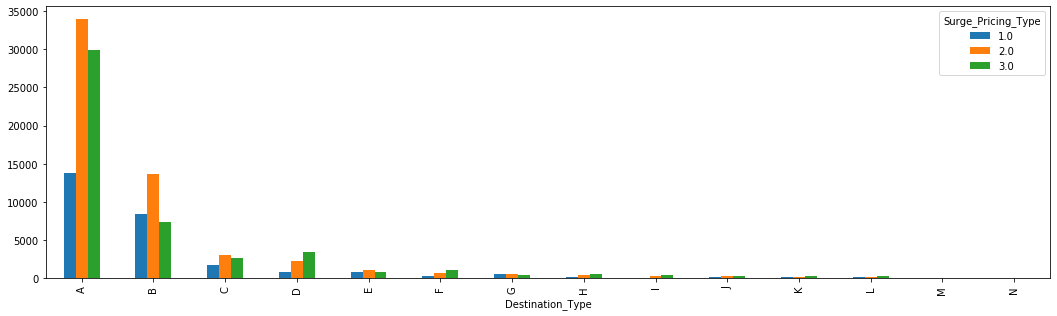

In [86]:
combine.groupby("Surge_Pricing_Type").Destination_Type.value_counts().unstack(0).plot.bar()

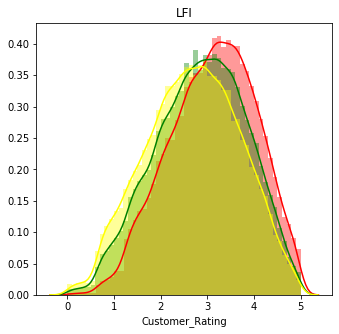

In [87]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Customer_Rating"],color="red")
sns.distplot(data2["Customer_Rating"],color="green")
sns.distplot(data3["Customer_Rating"],color="yellow")
plt.title("LFI")
plt.show()

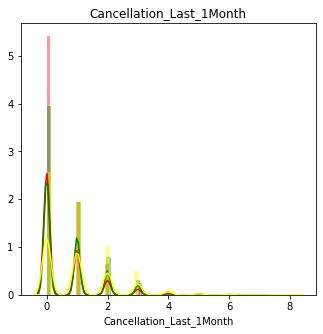

In [88]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Cancellation_Last_1Month"],color="red")
sns.distplot(data2["Cancellation_Last_1Month"],color="green")
sns.distplot(data3["Cancellation_Last_1Month"],color="yellow")
plt.title("Cancellation_Last_1Month")
plt.show()

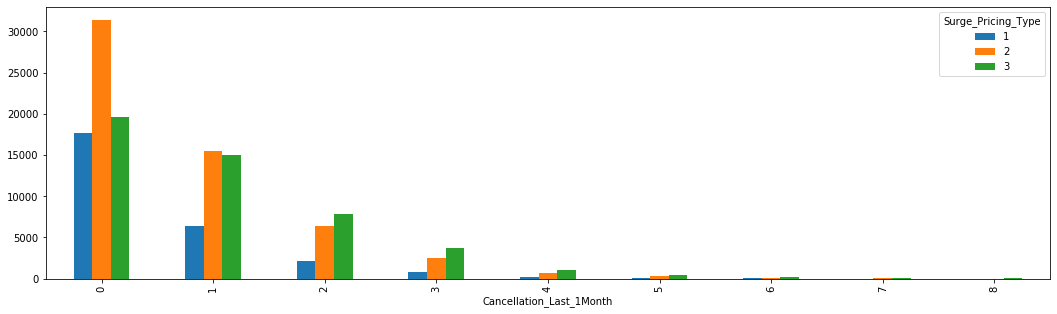

In [89]:
data_train.groupby("Surge_Pricing_Type").Cancellation_Last_1Month.value_counts().unstack(0).plot.bar()

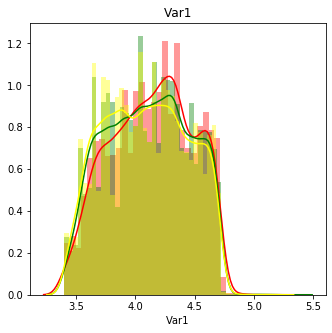

In [91]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(np.log(data1["Var1"]),color="red")
sns.distplot(np.log(data2["Var1"]),color="green")
sns.distplot(np.log(data3["Var1"]),color="yellow")
plt.title("Var1")
plt.show()

In [7]:
combine["Var1"]=np.log(combine["Var1"])

In [93]:
combine["Var1"].describe()

count    101238.000000
mean          4.102318
std           0.343096
min           3.401197
25%           3.828641
50%           4.110874
75%           4.369448
max           5.347108
Name: Var1, dtype: float64

In [8]:
combine["Var1"].fillna(np.mean(combine["Var1"]),inplace=True)

In [95]:
combine["Var1"].isnull().sum()

0

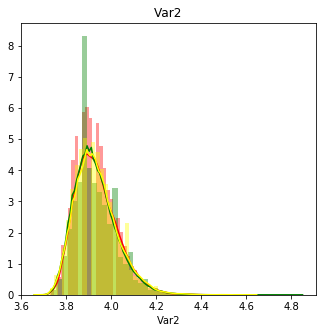

In [96]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(np.log(data1["Var2"]),color="red")
sns.distplot(np.log(data2["Var2"]),color="green")
sns.distplot(np.log(data3["Var2"]),color="yellow")
plt.title("Var2")
plt.show()

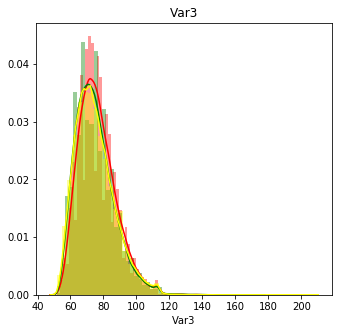

In [27]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Var3"],color="red")
sns.distplot(data2["Var3"],color="green")
sns.distplot(data3["Var3"],color="yellow")
plt.title("Var3")
plt.show()

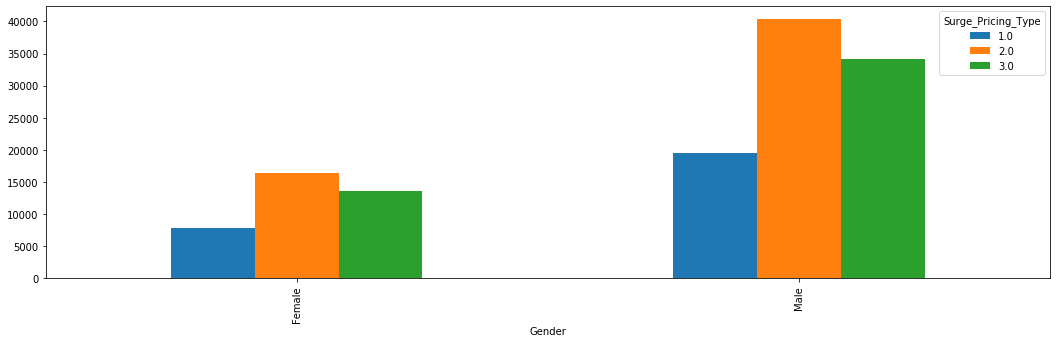

In [98]:
combine.groupby("Surge_Pricing_Type").Gender.value_counts().unstack(0).plot.bar()

In [9]:
missing_val ={}
missing_val_idx={}
cols = list(combine.columns)
for col in cols:
    missing_val[col]=combine[col].isna().sum()
    missing_val_idx[col]= list(combine.loc[combine[col].isna()].index)

In [105]:
print(missing_val)

{'Trip_ID': 0, 'Trip_Distance': 0, 'Type_of_Cab': 33368, 'Customer_Since_Months': 9886, 'Life_Style_Index': 0, 'Confidence_Life_Style_Index': 33520, 'Destination_Type': 0, 'Customer_Rating': 0, 'Cancellation_Last_1Month': 0, 'Var1': 0, 'Var2': 0, 'Var3': 0, 'Gender': 0, 'Surge_Pricing_Type': 87395}


In [10]:
#combine1.dtypes
cols = ["Type_of_Cab","Customer_Since_Months","Confidence_Life_Style_Index","Destination_Type","Gender"]
for col in cols:
    combine[col]=combine[col].astype("category")

In [11]:
combine1 = combine.drop(columns=["Trip_ID","Surge_Pricing_Type"])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def getmissingval(X_train,Y_train,X_mis):
    model = KNeighborsClassifier()
    model.fit(X_train,Y_train)
    Y_mis=model.predict(X_mis)
    return Y_mis

cols1 = ["Customer_Since_Months","Type_of_Cab","Confidence_Life_Style_Index"]

for col in cols1:
    X_mis = combine1.loc[missing_val_idx[col]]
    X_train = combine1.drop(missing_val_idx[col])
    Y_train = X_train[col]
    X_train = X_train.drop(columns=[col])
    X_train = pd.get_dummies(X_train)
    X_mis = X_mis.drop(columns=[col])
    X_mis = pd.get_dummies(X_mis)
    Y_mis = getmissingval(X_train,Y_train,X_mis)
    for i in range(missing_val[col]):
        combine1[col][missing_val_idx[col][i]]=Y_mis[i]


In [115]:
combine1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,6.77,B,0to3,2.427690,A,A,3.90500,0,3.688879,46,60,Female
1,29.47,B,Ten,2.782450,B,A,3.45000,0,3.637586,56,78,Male
2,41.58,B,Ten,2.802594,A,E,3.50125,2,4.102318,56,77,Male
3,61.56,C,Ten,2.802594,B,A,3.45375,0,4.102318,52,74,Male
4,54.95,C,Ten,3.034530,B,A,3.40250,4,3.931826,49,102,Male


In [116]:
combine.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,0to3,2.427690,A,A,3.90500,0,3.688879,46,60,Female,2.0
1,T0005689461,29.47,B,Ten,2.782450,B,A,3.45000,0,3.637586,56,78,Male,2.0
2,T0005689464,41.58,NaN,Ten,2.802594,NaN,E,3.50125,2,4.102318,56,77,Male,2.0
3,T0005689465,61.56,C,Ten,2.802594,NaN,A,3.45375,0,4.102318,52,74,Male,3.0
4,T0005689467,54.95,C,Ten,3.034530,B,A,3.40250,4,3.931826,49,102,Male,2.0


In [13]:
combine1["Trip_ID"] = combine["Trip_ID"]
combine1["Surge_Pricing_Type"] = combine["Surge_Pricing_Type"]

In [156]:
combine1.dtypes

Trip_Distance                   float64
Type_of_Cab                    category
Customer_Since_Months          category
Life_Style_Index                float64
Confidence_Life_Style_Index    category
Destination_Type               category
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                         category
Trip_ID                          object
Surge_Pricing_Type              float64
dtype: object

In [14]:
data_test = combine1[combine1["Surge_Pricing_Type"].isnull()]

In [15]:
data_test = data_test.drop(columns=["Surge_Pricing_Type","Trip_ID"])

In [16]:
data_train = combine1[combine1["Surge_Pricing_Type"].notna()]

In [17]:
data_train["Surge_Pricing_Type"] = data_train["Surge_Pricing_Type"].astype("int")

C:\Users\I354298\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
data_train.dtypes

Trip_Distance                   float64
Type_of_Cab                    category
Customer_Since_Months          category
Life_Style_Index                float64
Confidence_Life_Style_Index    category
Destination_Type               category
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                         category
Trip_ID                          object
Surge_Pricing_Type                int32
dtype: object

In [18]:
#Model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import lightgbm as lgb

Y = data_train["Surge_Pricing_Type"]
X = data_train.drop(columns=["Surge_Pricing_Type","Trip_ID"])
X1 = pd.get_dummies(X)
X_test = pd.get_dummies(data_test)



In [19]:
Y = Y-1

In [172]:
Y.value_counts()

1    56728
2    47720
0    27214
Name: Surge_Pricing_Type, dtype: int64

In [177]:
evals_result = {}
feature_imp = pd.DataFrame()
features = [feat for feat in X1.columns]
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state =8736)
param = {
    'bagging_freq': 125,
    'bagging_fraction': 0.9984231784564706,
    'boost_from_average':'false',
    'boosting_type': 'gbdt',
    'feature_fraction': 0.54,
    'learning_rate': 0.005,
    'max_depth': -1,  
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 16.0,
    'num_leaves': 30,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'multiclass',
    'num_class': 3,
    'verbosity': 1,
    "n_jobs":-1,
    "metric" : "multi_logloss",
}

predictions = np.zeros((len(X1),3))
predictions_test = np.zeros((len(X_test),3))

for fold_, (train_idx,val_idx) in enumerate(folds.split(X1.values,Y.values)):
    print("Fold {}".format(fold_+1))
    #old_score = score
    d_train = lgb.Dataset(X1.iloc[train_idx][features], label=Y.iloc[train_idx])
    d_val = lgb.Dataset(X1.iloc[val_idx][features],label=Y.iloc[val_idx])
    num_round = 1000000
    clf = lgb.train(param,d_train,num_round,valid_sets=[d_train,d_val],verbose_eval=1000, early_stopping_rounds=5000,evals_result=evals_result)
    oof = clf.predict(X1.iloc[val_idx][features],num_iteration=clf.best_iteration)
    #score = roc_auc_score(Y.iloc[val_idx],oof)
    fold_imp = pd.DataFrame()
    fold_imp["Feature"] = features
    fold_imp["importance"] = clf.feature_importance()
    fold_imp["fold"] = fold_ +1
    feat_imp_df = pd.concat([feature_imp,fold_imp], axis=0)
    predictions += clf.predict(X1, num_iteration=clf.best_iteration)
    predictions_test += clf.predict(X_test, num_iteration=clf.best_iteration)
    #predictions = clf.predict(X_sub, num_iteration=clf.best_iteration)
    pred_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])
    oof_lab = pd.DataFrame([np.argmax(pr) for pr in oof])
    acc_score = accuracy_score(Y,pred_lab)
    oof_acc = accuracy_score(Y.iloc[val_idx],oof_lab)
    print("OOF Accuracy {} and Training Accuracy {}".format(oof_acc,acc_score))

C:\Users\I354298\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold 1
Training until validation scores don't improve for 5000 rounds
[1000]	training's multi_logloss: 0.744219	valid_1's multi_logloss: 0.753124
[2000]	training's multi_logloss: 0.721336	valid_1's multi_logloss: 0.738087
[3000]	training's multi_logloss: 0.710213	valid_1's multi_logloss: 0.734743
[4000]	training's multi_logloss: 0.701788	valid_1's multi_logloss: 0.733863
[5000]	training's multi_logloss: 0.694469	valid_1's multi_logloss: 0.733652
[6000]	training's multi_logloss: 0.687688	valid_1's multi_logloss: 0.733765
[7000]	training's multi_logloss: 0.681215	valid_1's multi_logloss: 0.733968
[8000]	training's multi_logloss: 0.674923	valid_1's multi_logloss: 0.734172
[9000]	training's multi_logloss: 0.669014	valid_1's multi_logloss: 0.734601
Early stopping, best iteration is:
[4630]	training's multi_logloss: 0.697095	valid_1's multi_logloss: 0.73361
OOF Accuracy 0.6890873739214971 and Training Accuracy 0.7032477100454193
Fold 2
Training until validation scores don't improve for 5000 

In [179]:
prediction_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])

In [180]:
print(prediction_lab)

        0
0       1
1       1
2       1
3       1
4       2
...    ..
131657  2
131658  1
131659  1
131660  1
131661  0

[131662 rows x 1 columns]


In [181]:
accuracy_score(Y,prediction_lab)

0.7051313211101153

In [182]:
prediction_test_lab = pd.DataFrame([np.argmax(pr) for pr in predictions_test])

In [184]:
prediction_test_lab = prediction_test_lab+1

In [199]:
test = list(combine1[combine1["Surge_Pricing_Type"].isnull()]["Trip_ID"])

In [202]:
sub = pd.DataFrame({"Trip_ID":test,"Surge_Pricing_Type":prediction_test_lab[0]})

In [203]:
sub.to_csv("predictions.csv",index=False)

In [22]:
from xgboost import XGBClassifier
predictions = np.zeros((len(X1),3))
predictions_test1 = np.zeros((len(X_test),3))
features = [feat for feat in X1.columns]
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state =8736)
for fold_, (train_idx,val_idx) in enumerate(folds.split(X1,Y)):
    print("Fold {}".format(fold_+1))
    #old_score = score
    clf = XGBClassifier(n_estimators=500,verbosity=1,objective="multi:softprob",learning_rate =0.05,num_class =3,eval_metric="mlogloss",early_stopping_rounds=10)
    clf.fit(X1.iloc[train_idx][features],Y.iloc[train_idx])
    best_iteration = clf.get_booster().best_ntree_limit
    oof = clf.predict_proba(X1.iloc[val_idx][features],ntree_limit=best_iteration)
    #score = roc_auc_score(Y.iloc[val_idx],oof)
    #fold_imp = pd.DataFrame()
    #fold_imp["Feature"] = features
    #fold_imp["importance"] = clf.feature_importance()
    #fold_imp["fold"] = fold_ +1
    #feat_imp_df = pd.concat([feature_imp,fold_imp], axis=0)
    predictions += clf.predict_proba(X1,ntree_limit=best_iteration)
    predictions_test1 += clf.predict_proba(X_test,ntree_limit=best_iteration)
    #predictions = clf.predict(X_sub, num_iteration=clf.best_iteration)
    pred_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])
    oof_lab = pd.DataFrame([np.argmax(pr) for pr in oof])
    acc_score = accuracy_score(Y,pred_lab)
    oof_acc = accuracy_score(Y.iloc[val_idx],oof_lab)      
    print("OOF accuracy {} and Training accuracy {}".format(oof_acc,acc_score))

C:\Users\I354298\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold 1
OOF accuracy 0.6875075950905335 and Training accuracy 0.7134176907535963
Fold 2
OOF accuracy 0.6896949811641755 and Training accuracy 0.7133113578709119
Fold 3
OOF accuracy 0.6904848705796574 and Training accuracy 0.7132809770472878
Fold 4
OOF accuracy 0.689148134645765 and Training accuracy 0.7128100742811138
Fold 5
OOF accuracy 0.688419005954551 and Training accuracy 0.7129695736051405
Fold 6
OOF accuracy 0.6948596427269413 and Training accuracy 0.7126733605748052
Fold 7
OOF accuracy 0.6932004618095643 and Training accuracy 0.71285564551655
Fold 8
OOF accuracy 0.6926535820623443 and Training accuracy 0.7129543831933284


In [23]:
prediction_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])
accuracy_score(Y,prediction_lab)

0.7129543831933284

In [24]:
prediction_test_lab = pd.DataFrame([np.argmax(pr) for pr in predictions_test1])
prediction_test_lab = prediction_test_lab+1
test = list(combine1[combine1["Surge_Pricing_Type"].isnull()]["Trip_ID"])
sub = pd.DataFrame({"Trip_ID":test,"Surge_Pricing_Type":prediction_test_lab[0]})
sub.to_csv("predictions1.csv",index=False)